#Problem P1
You are designing a spherical tank (Figure below) to hold water for a small village in a developing country. The volume of liquid it can hold can be computed as $ V={3R-h \over3}\pi h^{2}$ where $V$ = volume [$\rm{m^3}$], $h$ = depth of water in tank [m], and $R$ = the tank radius [m]. If $R = 3$ m, what depth must the tank be filled to so that it holds $30 \,\rm{[m^3]}$?
1. Use Bisection method in python with interval $[0,R]$ to find the root with error tolerance of 1e-4. Make sure convergence is acheived.
2. Plot $V(h)$ and show the root to illustrate that the root is located.

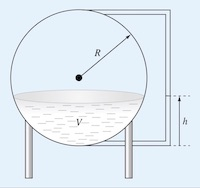

2.026905728308975


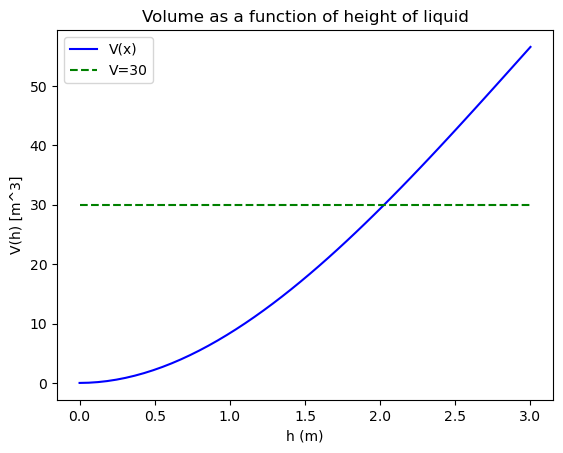

In [2]:
# P1 solution
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
R = 3.0
V = lambda h: (3*R-h)/3 * np.pi * h**2
epsilon = 1e-4
goal = 30
V_adj = lambda h: V(h) - goal
root = optimize.bisect(V_adj, 0, R)
print(root)
x = np.linspace(0, 3)

plt.title("Volume as a function of height of liquid")
plt.xlabel("h (m)")
plt.ylabel("V(h) [m^3]")
plt.plot(x, V(x), 'b-', label='V(x)')
plt.plot(x, np.full_like(x, V(root)), 'g--', label='V=30')

plt.legend()
plt.show()

# Problem P2
The concentration of pollutant bacteria $c$ in a lake decreases according to
$c=77e^{-1.5t}+20e^{-0.08t}$. Determine the time required for the bacteria concentration to be reduced to $15$ using the Newton-Raphson method with an initial guess of $t = 6$.
1.   Use `newtonRaphson` function in Python with error tolerance of 1e-4. Make sure convergence is acheived.
2.   Use the `fsolve` function in Python with error tolerance of 1e-4.

In [3]:
# P2 Solution
c = lambda t: 77*np.exp(-1.5*t) + 20*np.exp(-0.08*t)
c_prime = lambda t: -1.5*77*np.exp(-1.5*t) + 20*-0.08*np.exp(-0.08*t)
t_0 = 6
c_f = 15
c_adj = lambda t: c(t) - c_f

root = optimize.newton(c_adj, t_0, fprime=c_prime, tol=epsilon)
print(f"newton-raphson = {root}")

root2 = optimize.fsolve(c_adj, t_0, fprime=c_prime, xtol=epsilon)
print(f"fsolve = {root2}")


newton-raphson = 3.8095000761895066
fsolve = [3.80950008]


# Problem P3
In thermodynamics the specific heat $c_{p}\,[kJ/(kg K)]$ for air can be expressed as a polynomial in terms of temperature $T\, [K]$ as
$
c_{p}=0.99403+1.671\times 10^{-4}T+9.7215\times10^{-8}T^{2}-9.5838\times 10^{-11}T^{3}+1.9520\times 10^{-14}T^{4}
$

1.   Use pyhton `fsolve` function with error tolerance of 1e-6 to find $T$ when $c_{p}=1.1\,[kJ/(kg K)]$. Use initial guess of $T_{0}=300\,K$.

1. Use pyhton `roots` function to assess the accuracy Part 1 results. You may find multiple roots, some of which may be complex numbers ($a+bj$ where $j=\sqrt{-1}$). You need to rule out the unphysical ones.

In [4]:
# P3 solution
cp = lambda T: 0.99403 + 1.671e-4 * T + 9.7315e-8 * T**2 - 9.5838e-11 * T**3 + 1.9520e-14 * T**4
epsilon = 1e-6
cp_f = 1.1
cp_adj = lambda T: cp(T) - cp_f
T_0 = 300

roots = optimize.fsolve(cp_adj, T_0, xtol=epsilon)
print(roots)

coeffs = [1.9520e-14, -9.5838e-11, 9.7315e-8, 1.671e-4, -.10597]
roots2 = np.roots(coeffs)
roots2_filtered = [root.real for root in roots2 if root.imag == 0 and root.real > 0]
        
print(roots2_filtered)

[543.93986341]
[543.939863411649]


# Problem P4
Determine the maximum location, $x_{max}$, and the maximum value, $f(x_{max})$, of the following function
$
f(x)=-0.8x^{4}+2.2x^{2}+0.6
$

1. Use `minimize_scalar` function with error tolerance of 1e-6 in the interval [0.7,1.4].

2. Use `fmin` function with tolerance of 1e-6 and initial guess of x=0.7 and compare the result with part 1.

In [5]:
# P4 Solution
epsilon = 1e-6
a, b = 0.7, 1.4

f = lambda x: -0.8*x**4 + 2.2*x**2 + 0.6
f_inv = lambda x: -f(x)

f_max = optimize.minimize_scalar(f_inv, bounds=(a,b), tol=epsilon)
print(f_max.x)

x0 = 0.7
f_max2 = optimize.fmin(f_inv, x0, xtol=epsilon, full_output=True)
print(f_max2[0])

1.172603902067737
Optimization terminated successfully.
         Current function value: -2.112500
         Iterations: 23
         Function evaluations: 46
[1.17260414]


/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
